In [1]:
# the dataset URL:
# https://www.kaggle.com/ammaraahmad/tesla-stocks-history

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("archive/TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [4]:
# we have stock prices from 2010 to 2021
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2808,2021-08-24,710.679993,715.219971,702.640015,708.489990,708.489990,13083100
2809,2021-08-25,707.030029,716.969971,704.000000,711.200012,711.200012,12645600
2810,2021-08-26,708.309998,715.400024,697.619995,701.159973,701.159973,13214300
2811,2021-08-27,705.000000,715.000000,702.099976,711.919983,711.919983,13762100
2812,2021-08-30,714.719971,731.000000,712.729980,730.909973,730.909973,18502400


In [5]:
df.shape

(2813, 7)

In [6]:
df.info()
# all the columns are numerical exept the date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2813 entries, 0 to 2812
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2813 non-null   object 
 1   Open       2813 non-null   float64
 2   High       2813 non-null   float64
 3   Low        2813 non-null   float64
 4   Close      2813 non-null   float64
 5   Adj Close  2813 non-null   float64
 6   Volume     2813 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 154.0+ KB


In [7]:
df.isnull().sum()
# we don't have any missing values in the data

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
# since i an not a stock expert i will take only the open culumn for prediction
data = df["Open"]
data.head()

0    3.800
1    5.158
2    5.000
3    4.600
4    4.000
Name: Open, dtype: float64

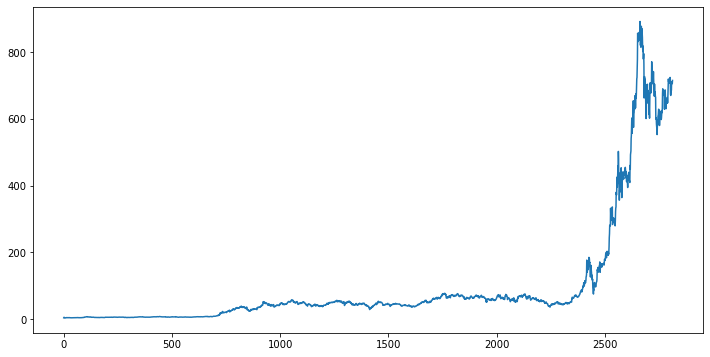

In [9]:
# lets plot this column
plt.figure(figsize=(12,6))
plt.plot(data)

In [10]:
from sklearn.preprocessing import MinMaxScaler
# we will predict a day stock based on the last 100 days
train_size = int(len(data) * 0.75)
# lstm require normelized and scaled data between 0-1 so we well use minMx scaler and for that we reshape our data
data = np.array(data)
data = data.reshape(data.shape[0],1)

scaler=MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(data)

train = data[:train_size]
test = data[train_size:]
print(train_size)

2109


In [11]:
def extract_XY(dataset):
    x,y=[],[]    
#   here we create our x and y
    for i in range(100, len(dataset)):
        x.append(dataset[i-100 : i , 0])
        y.append(dataset[i , 0])
    return np.array(x), np.array(y)

In [12]:
x_train,y_train = extract_XY(train)
x_test,y_test = extract_XY(test)

In [13]:
x_train.shape ,y_train.shape 

((2009, 100), (2009,))

In [14]:
x_test.shape ,y_test.shape 

((604, 100), (604,))

In [15]:
# LSTM expect 3D input  in the form of [samples, time steps, features] so we need to reshape X
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
x_train.shape, x_test.shape
# here he last value is 1 because we take only the open price it can be a vector of open,close ore any other variable

((2009, 100, 1), (604, 100, 1))

In [16]:
x_train[1,:10]
# all the values are scaled between 0 and 1

array([[2.17305145e-03],
       [1.99515397e-03],
       [1.54478061e-03],
       [8.69220579e-04],
       [5.85485364e-05],
       [0.00000000e+00],
       [3.24268817e-04],
       [4.07587888e-04],
       [2.81483348e-04],
       [4.05336021e-04]])

<h1>the Model</h1>

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

In [18]:
model = Sequential()

In [19]:
# here i am going to use stacked lstm layers
model.add(LSTM(80, return_sequences=True, input_shape=(100,1)))
model.add(Dropout(0.2))

model.add(LSTM(70, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(60))
model.add(Dropout(0.2))

# no activation is specified so f(x)=x "i have used sigmoid and it does not work"
model.add(Dense(1))
# we use mean square error because we are predicting a number not a categorie the less the error is the better
model.compile(loss="mean_squared_error", optimizer='adam')

<h1>important : </h1>
<p>mean_squared_error is used when we are predicting a number and not classes<br>
for classification we use:<br>
binary_crossentropy for binary classificaton (true or false)<br>
categorical_crossentropy is used when our y_train is oneHot encoded expl for 3 classes we have ([0,0,1],[0,1,0],[1,0,0])<br>
spars_categorical_crossentropy is used when our y_tain is in the form of : ([1],[2],[3])</p>

In [20]:
model.fit(x_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
32/32 [==============================] - 9s 279ms/step - loss: 2.3953e-04
Epoch 2/50
32/32 [==============================] - 8s 260ms/step - loss: 3.2978e-05
Epoch 3/50
32/32 [==============================] - 8s 259ms/step - loss: 2.8807e-05
Epoch 4/50
32/32 [==============================] - 8s 260ms/step - loss: 3.3726e-05
Epoch 5/50
32/32 [==============================] - 8s 264ms/step - loss: 2.7045e-05
Epoch 6/50
32/32 [==============================] - 9s 268ms/step - loss: 2.3905e-05
Epoch 7/50
32/32 [==============================] - 8s 264ms/step - loss: 2.3693e-05
Epoch 8/50
32/32 [==============================] - 9s 276ms/step - loss: 2.1552e-05
Epoch 9/50
32/32 [==============================] - 8s 263ms/step - loss: 2.2111e-05
Epoch 10/50
32/32 [==============================] - 9s 267ms/step - loss: 2.1599e-05
Epoch 11/50
32/32 [==============================] - 8s 264ms/step - loss: 2.1146e-05
Epoch 12/50
32/32 [==============================] - 8s 258ms/s

In [21]:
model.evaluate(x_test,y_test)

19/19 [==============================] - 1s 55ms/step - loss: 0.0048


0.0047982847318053246

In [29]:
# we have a low loss that is good now lets plot the real data and pedicted one
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [30]:
# we ned to inverse the scale
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

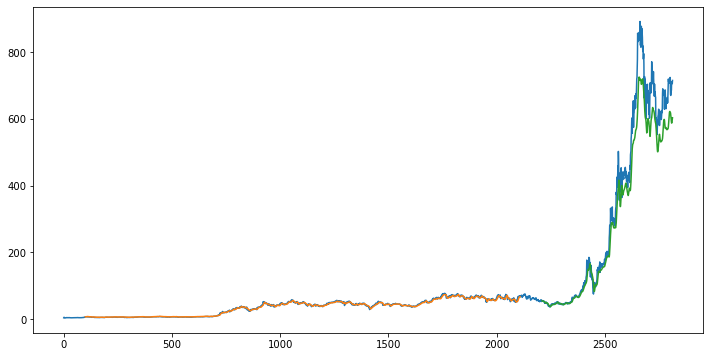

In [31]:
look_back=100
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(y_train_pred)+look_back, :] = y_train_pred
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+(look_back*2):len(data), :] = y_test_pred
# plot baseline and predictions
plt.figure(figsize=(12,6))
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
# lets try bidirectional lstm
model1 = Sequential()
model1.add(Bidirectional(LSTM(80, return_sequences=True, input_shape=(100,1))))
model1.add(Dropout(0.2))

model1.add(Bidirectional(LSTM(70, return_sequences=True)))
model1.add(Dropout(0.2))

model1.add(Bidirectional(LSTM(60)))
model1.add(Dropout(0.2))

model1.add(Dense(1))
model1.compile(loss="mean_squared_error", optimizer='adam')

In [34]:
model1.fit(x_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
32/32 [==============================] - 16s 503ms/step - loss: 2.0155e-04
Epoch 2/50
32/32 [==============================] - 16s 515ms/step - loss: 3.1383e-05
Epoch 3/50
32/32 [==============================] - 16s 508ms/step - loss: 2.1407e-05
Epoch 4/50
32/32 [==============================] - 16s 504ms/step - loss: 1.9947e-05
Epoch 5/50
32/32 [==============================] - 16s 515ms/step - loss: 1.8981e-05
Epoch 6/50
32/32 [==============================] - 16s 504ms/step - loss: 1.8557e-05
Epoch 7/50
32/32 [==============================] - 17s 525ms/step - loss: 1.6983e-05
Epoch 8/50
32/32 [==============================] - 16s 509ms/step - loss: 2.0750e-05
Epoch 9/50
32/32 [==============================] - 16s 513ms/step - loss: 1.5341e-05
Epoch 10/50
32/32 [==============================] - 16s 509ms/step - loss: 1.6927e-05
Epoch 11/50
32/32 [==============================] - 17s 521ms/step - loss: 1.5445e-05
Epoch 12/50
32/32 [==============================] -

In [35]:
model1.evaluate(x_test,y_test)

19/19 [==============================] - 2s 80ms/step - loss: 0.0051


0.005116070620715618

In [36]:
y_train_pred1 = scaler.inverse_transform(model.predict(x_train))
y_test_pred1 = scaler.inverse_transform(model.predict(x_test))

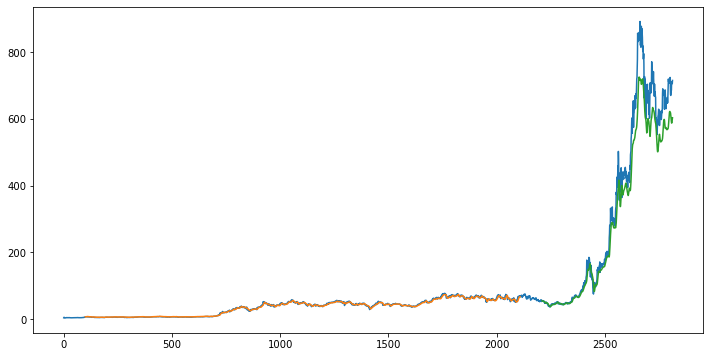

In [37]:
look_back=100
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(y_train_pred1)+look_back, :] = y_train_pred1
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred1)+(look_back*2):len(data), :] = y_test_pred1
# plot baseline and predictions
plt.figure(figsize=(12,6))
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()